
Building a model to predict  the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. 
Based on that they can  manipulate the design of the cars, the business strategy etc. and also to meet certain price levels. 
Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

# Importing the dataset

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading the dataset
df_car=pd.read_csv('car_price.csv')

In [3]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df_car.shape
#data contains 205 rows and 26 columns

(205, 26)

In [5]:
#statistical summary of the data
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
#datatypes of attributes present in the data
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Cleaning and Preparation

In [7]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
## splitting the company name from carName column
Company_Name=df_car['CarName'].apply(lambda x:x.split(' ')[0])
df_car.insert(3,'Company_Name',Company_Name)


In [9]:
#dropping carname column
df_car=df_car.drop('CarName',1)

In [10]:
df_car.head()

,car_ID,symboling,Company_Name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df_car['Company_Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
#Fixing Invalid Values.
#there are some spelling mistakes in the company name .So need to fix that
#maxda = mazda
#Nissan = nissan
#porsche = porcshce
#toyota = toyouta
#vokswagen = volkswagen = vw
df_car['Company_Name']=df_car['Company_Name'].str.lower()
def replace_name(a,b):
    df_car['Company_Name'].replace(a,b,inplace=True)
replace_name('maxda','mazda')
replace_name('Nissan','nissan')
replace_name('porcsche','porsche')
replace_name('toyouta','toyota')
replace_name('volkswagen','vokswagen')
replace_name('vw','volkswagen')

df_car['Company_Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'vokswagen', 'volkswagen', 'volvo'],
      dtype=object)

In [13]:
df_car['Company_Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'vokswagen', 'volkswagen', 'volvo'],
      dtype=object)

In [14]:
df_car.duplicated().sum()
#there is no duplicates in the dataset

0

In [15]:
df_car.isnull().sum()
#no null values

car_ID              0
symboling           0
Company_Name        0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
df_car.columns

Index(['car_ID', 'symboling', 'Company_Name', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Data Visualization

Visulization of Target variable

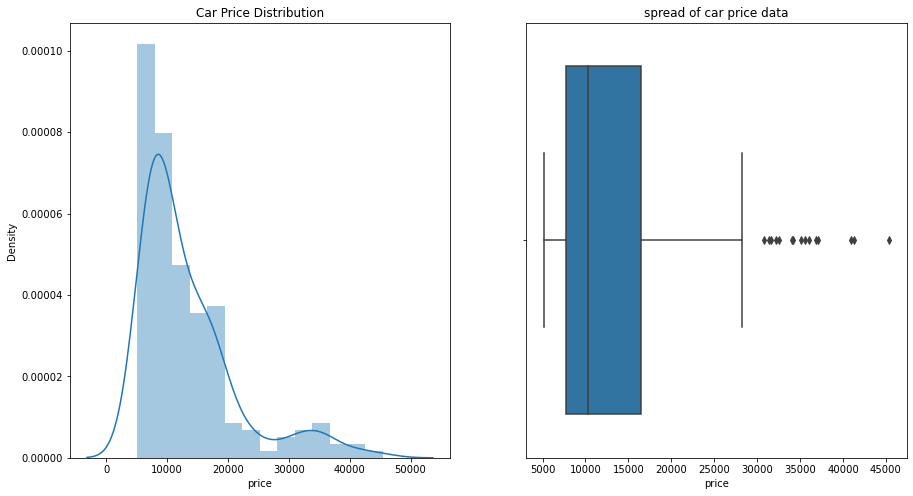

In [17]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(df_car['price'])
plt.title('Car Price Distribution')
plt.subplot(1,2,2)
sns.boxplot(df_car['price'])
plt.title('spread of car price data')
plt.show()

In [18]:
print(df_car.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


In [19]:
#1) The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000)
#2) There is a significant difference between the mean and the median of the price distribution
#3) The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

 Visualization of Categorical Data

In [20]:
df_car.select_dtypes(include=['object']).columns


Index(['Company_Name', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

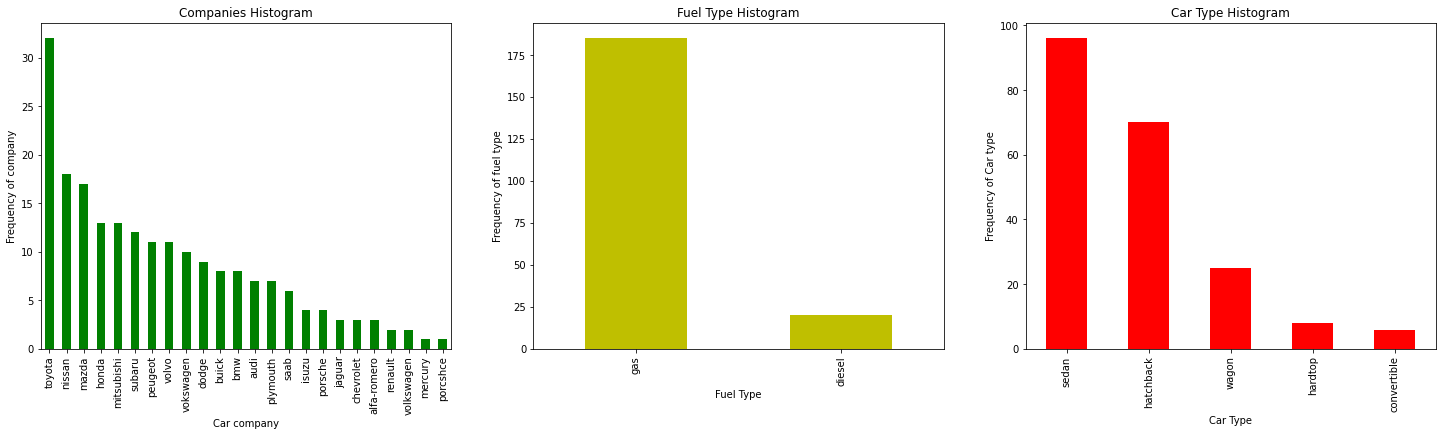

In [21]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df_car.Company_Name.value_counts().plot(kind='bar',color='g')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df_car.fueltype.value_counts().plot(kind='bar',color='y')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df_car.carbody.value_counts().plot(kind='bar',color='r')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()


1. Toyota seems to be the most favored car company
2. No of Gas fuels are more than diesel
3. Sedan is the top car type prefered

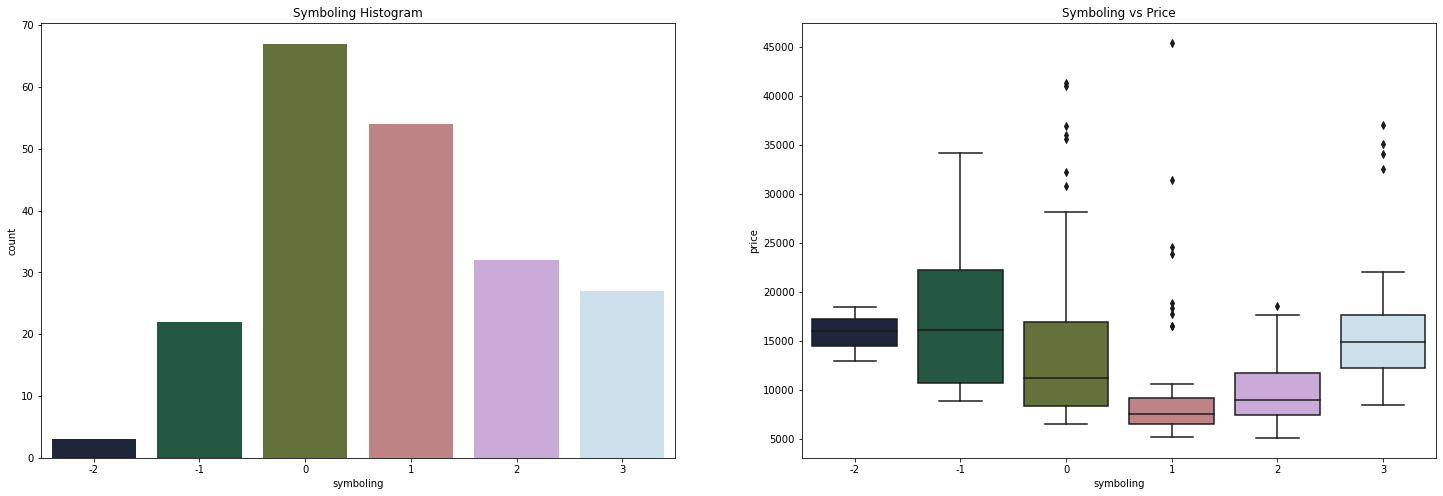

In [22]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df_car.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df_car.symboling, y=df_car.price, palette=("cubehelix"))

plt.show()

1. It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
2. The cars with -1 symboling seems to be high priced . But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

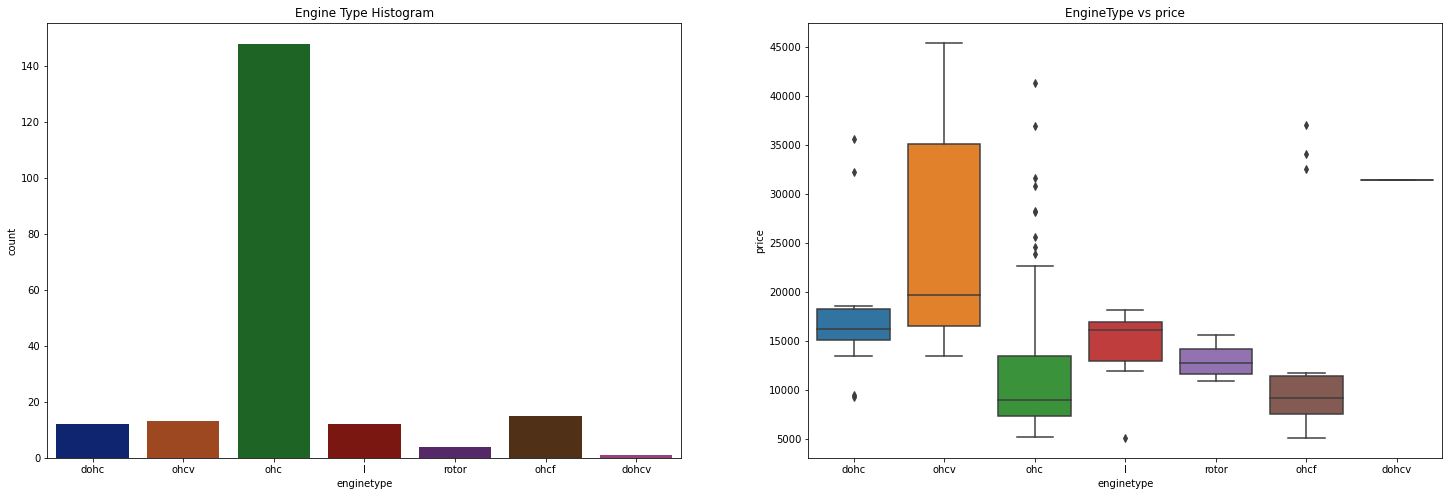

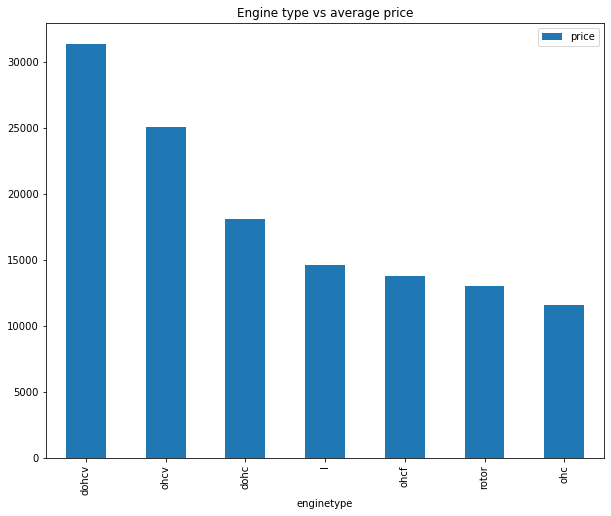

In [23]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(df_car.enginetype,palette='dark')

plt.subplot(1,2,2)
plt.title('EngineType vs price')
sns.boxplot(df_car.enginetype,df_car.price)

plt.show()

df=pd.DataFrame(df_car.groupby('enginetype')['price'].mean().sort_values(ascending=False))
df.plot.bar(figsize=(10,8))
plt.title('Engine type vs average price')
plt.show()

1. ohc Engine type seems to be most favored type.
2. ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Figure size 1080x576 with 0 Axes>

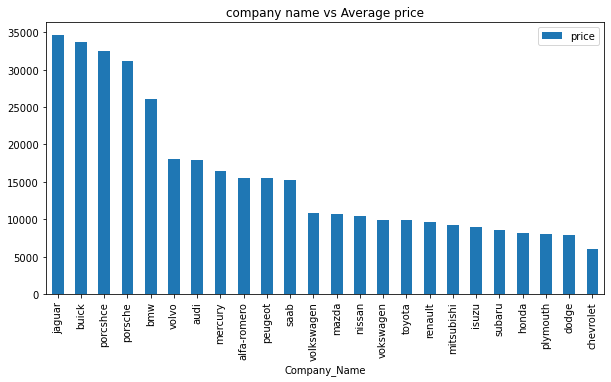

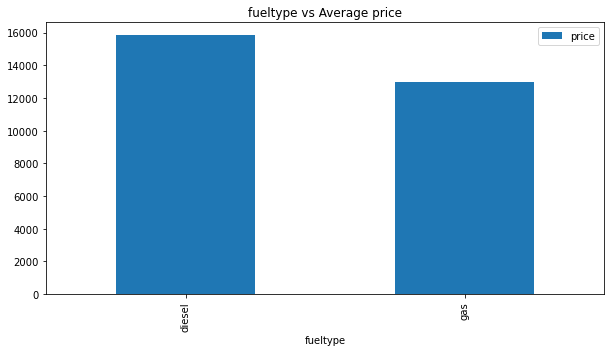

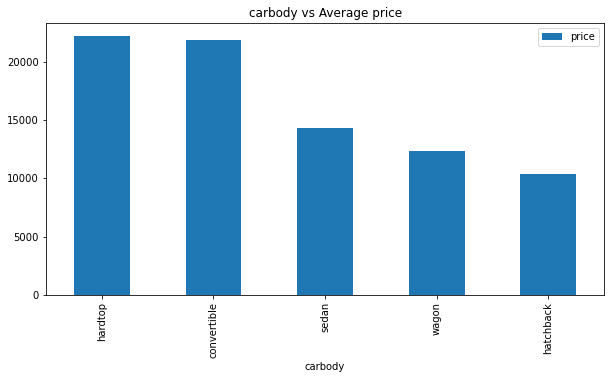

In [24]:
plt.figure(figsize=(15,8))
df=pd.DataFrame(df_car.groupby('Company_Name')['price'].mean().sort_values(ascending=False))
df.plot.bar(figsize=(10,5))
plt.title('company name vs Average price') 

df=pd.DataFrame(df_car.groupby('fueltype')['price'].mean().sort_values(ascending=False))
df.plot.bar(figsize=(10,5))
plt.title('fueltype vs Average price') 

df=pd.DataFrame(df_car.groupby('carbody')['price'].mean().sort_values(ascending=False))
df.plot.bar(figsize=(10,5))
plt.title('carbody vs Average price') 

plt.show()

1. Jaguar and Buick seem to have highest average price.
2. diesel has higher average price than gas.
3. hardtop and convertible have higher average price.

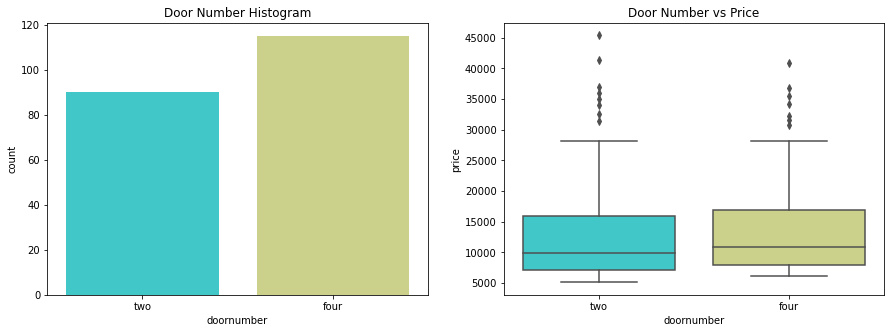

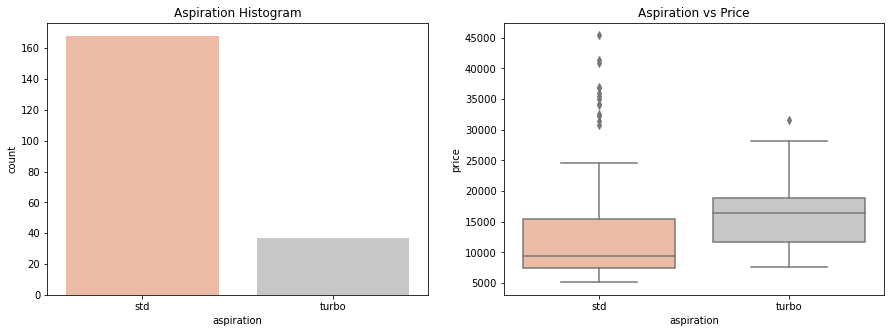

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(df_car.doornumber, palette=("rainbow"))


plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df_car.doornumber, y=df_car.price, palette=("rainbow"))

plt.show()


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(df_car.aspiration, palette=("RdGy"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df_car.aspiration, y=df_car.price, palette=('RdGy'))

plt.show()

1. Doornumber variable is not affecting the price much. There is no significant difference between the categories in it.
2. It seems aspiration with turbo have higher price range than the std(though it has some high values outside the upper whiskers.

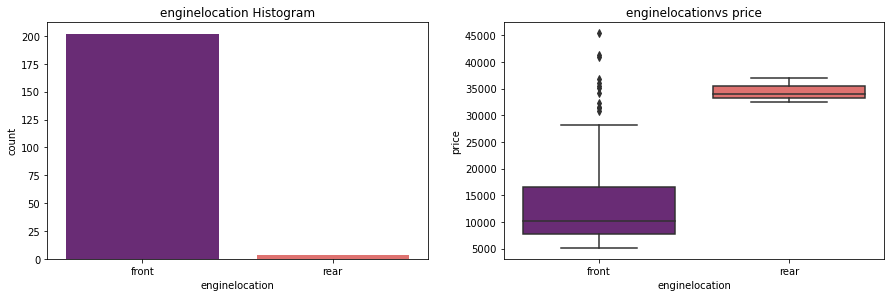

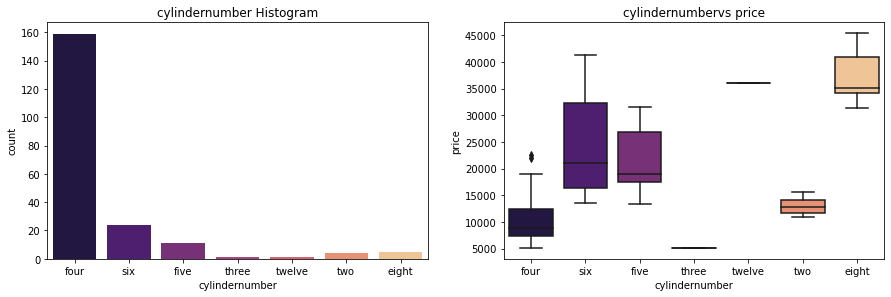

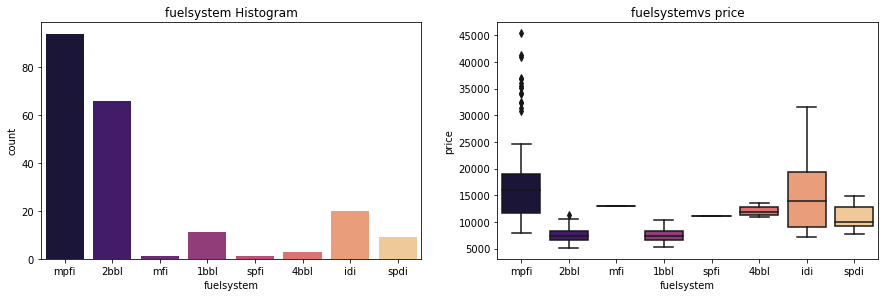

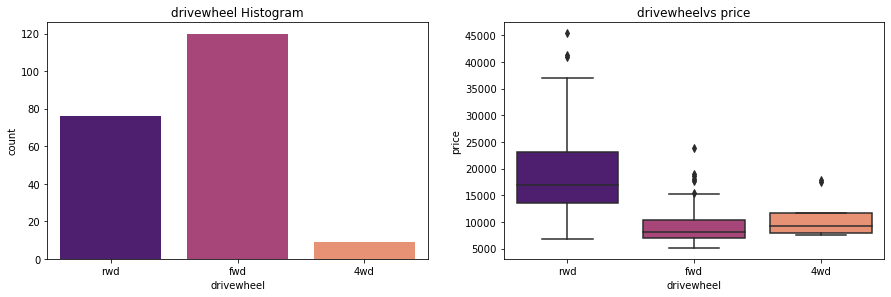

<Figure size 432x288 with 0 Axes>

In [26]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df_car[x],palette='magma')
    
    plt.subplot(4,2,fig+1)
    plt.title(x+'vs price')
    sns.boxplot(df_car[x],df_car['price'],palette='magma')
    plt.show()
plt.figure(figsize=(15,20))
plot_count('enginelocation',1)

plt.figure(figsize=(15,20))
plot_count('cylindernumber',3)

plt.figure(figsize=(15,20))
plot_count('fuelsystem',5)

plt.figure(figsize=(15,20))
plot_count('drivewheel',7)

plt.tight_layout()


1. Very few datapoints for enginelocation categories to make an inference.
2. Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
3. mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seems to prefer rwd drivewheel.

Visualization of Numerical variables

In [27]:
df_car.select_dtypes(include=np.number).columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

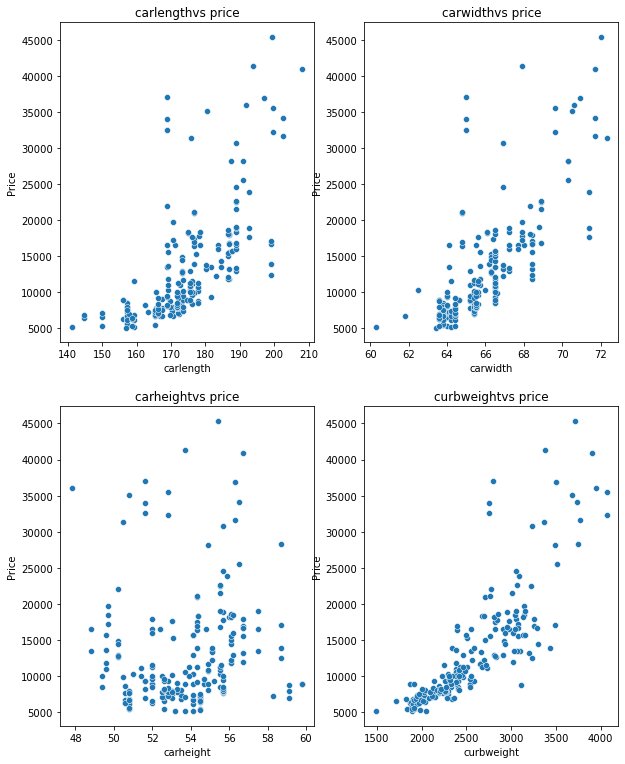

<Figure size 432x288 with 0 Axes>

In [28]:
def scatter(x,fig):
    plt.subplot(3,2,fig)
    sns.scatterplot(df_car[x],df_car['price'])
    plt.title(x+'vs price')
    plt.ylabel('Price')
    plt.xlabel(x)
plt.figure(figsize=(10,20))
scatter('carlength',1)
scatter('carwidth',2)
scatter('carheight',3)
scatter('curbweight',4)
plt.show()
plt.tight_layout()    

1. carwidth, carlength and curbweight seems to have a poitive correlation with price.
2. carheight doesn't show any significant trend with price.

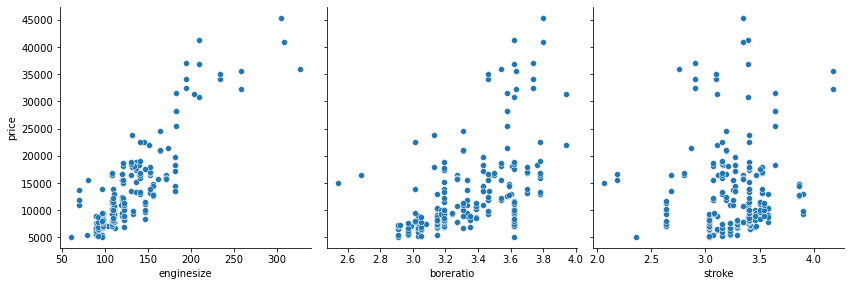

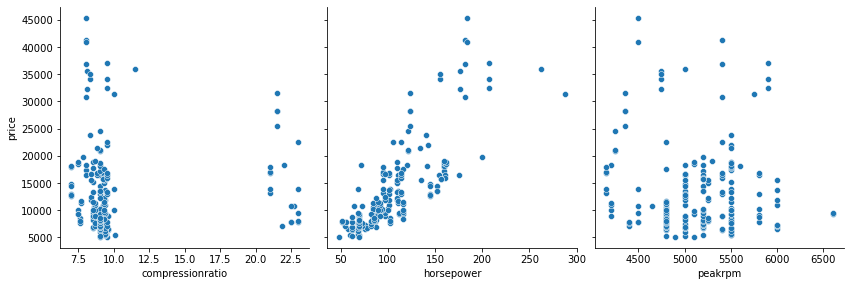

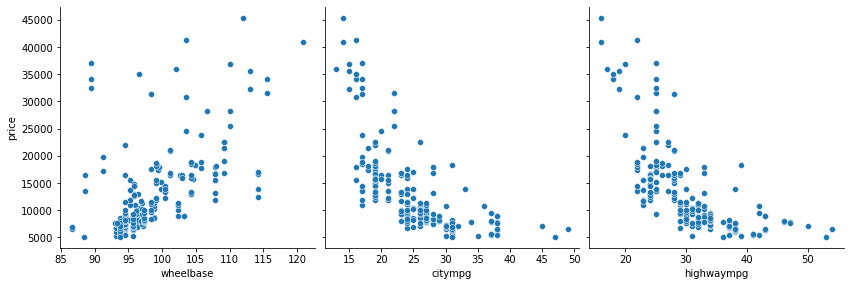

In [29]:
def pplot(x,y,z):
    sns.pairplot(df_car, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pplot('enginesize', 'boreratio', 'stroke')
pplot('compressionratio', 'horsepower', 'peakrpm')
pplot('wheelbase', 'citympg', 'highwaympg')

1. we can visualize that enginesize,boreratio,wheelbase,horsepower are positively correlated with the price
2. highwaympg,citympg are negatively correlated
3. stroke,compressionratio,peakrpm,citympg are not showing any significance

<AxesSubplot:>

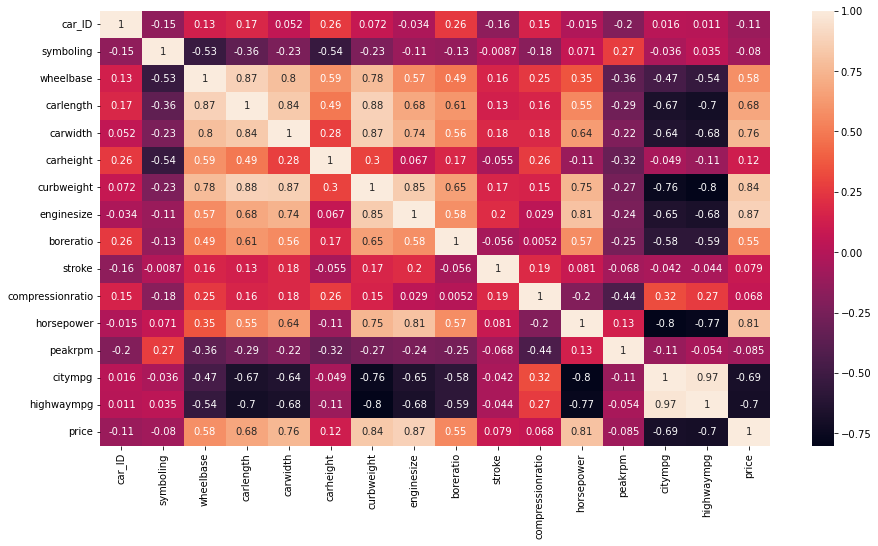

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(df_car.corr(),annot=True)

. Highly correlated variables with the target variable 'price' are curbweight,carwidth,horsepower,highwaympg,enginesize
. There is a presence of multicollinearity between independent variables curbweight,wheelbase,carlength,cyrbwidth,enginesize,horsepower,highwaympg,citympg,

# Feature Engineering

In [31]:
# A single variable mileage can be calculated by taking 55% citympg and 45% highwaympg
df_car['mileage'] = df_car['citympg']*0.55 + df_car['highwaympg']*0.45


In [32]:
#Binning the Car Companies based on avg prices of each Company.
df_car['price'] = df_car['price'].astype('int')
temp = df_car.copy()
table = temp.groupby(['Company_Name'])['price'].mean()
temp = temp.merge(table, how='left',on='Company_Name')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df_car['cars_range'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df_car.head()

,car_ID,symboling,Company_Name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,cars_range
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


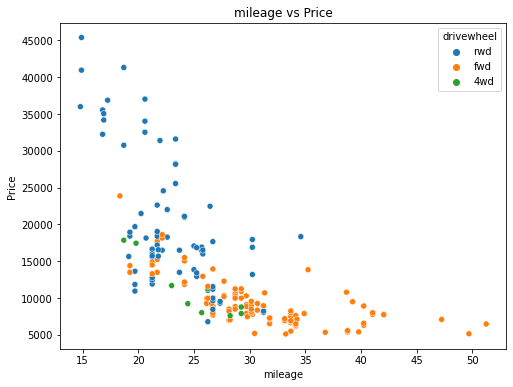

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure(figsize=(8,6))

plt.title('mileage vs Price')
sns.scatterplot(x=df_car['mileage'],y=df_car['price'],hue=df_car['drivewheel'])
plt.xlabel('mileage')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

mileage have a negative correlation with price

List of significant variables aftr visualization
- cars_range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [34]:
df_car.select_dtypes(np.number).columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'mileage'],
      dtype='object')

In [35]:
cars_lr = df_car[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'mileage', 'carlength','carwidth', 'cars_range']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,mileage,carlength,carwidth,cars_range
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


# Dummy Encoding

In [36]:
def dummy(x,df):
    temp=pd.get_dummies(df[x],drop_first=True)
    df=pd.concat([df,temp],axis=1)
    df.drop([x],axis=1,inplace=True)
    return df

cars_lr = dummy('fueltype',cars_lr)
cars_lr = dummy('aspiration',cars_lr)
cars_lr = dummy('carbody',cars_lr)
cars_lr = dummy('drivewheel',cars_lr)
cars_lr = dummy('enginetype',cars_lr)
cars_lr = dummy('cylindernumber',cars_lr)
cars_lr = dummy('cars_range',cars_lr)

In [37]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,mileage,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [38]:
cars_lr.shape

(205, 31)

# Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 10)

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','mileage','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,mileage,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
43,0.041383,0.224490,0.329325,0.202429,0.550000,0.188679,0.312242,0.441791,0.128205,1,...,0,0,0,1,0,0,0,0,0,0
78,0.038504,0.206997,0.200155,0.125506,0.307143,0.125786,0.529574,0.241791,0.350427,1,...,0,0,0,1,0,0,0,0,0,0
143,0.120203,0.309038,0.330489,0.190283,0.771429,0.289308,0.379642,0.461194,0.435897,1,...,0,0,0,1,0,0,0,0,0,0
21,0.011271,0.206997,0.150504,0.117409,0.307143,0.125786,0.657497,0.241791,0.299145,1,...,0,0,0,1,0,0,0,0,0,0
128,0.792165,0.084548,0.508922,0.538462,0.857143,1.000000,0.156809,0.414925,0.401709,1,...,0,0,0,0,1,0,0,0,0,1


In [42]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,mileage,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000
mean,0.190925,0.345654,0.394731,0.253220,0.551149,0.335620,0.363636,0.477455,0.459088,0.923077,...,0.048951,0.006993,0.034965,0.818182,0.111888,0.006993,0.0,0.006993,0.328671,0.104895
std,0.197421,0.173896,0.192184,0.159618,0.195440,0.231324,0.184069,0.188913,0.171908,0.267406,...,0.216524,0.083624,0.184337,0.387050,0.316337,0.083624,0.0,0.083624,0.471381,0.307495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.058661,0.230321,0.247091,0.145749,0.375000,0.138365,0.211829,0.376119,0.316239,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.120203,0.300292,0.354926,0.198381,0.521429,0.289308,0.352132,0.467164,0.435897,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.269934,0.425656,0.524438,0.311741,0.742857,0.427673,0.511004,0.583582,0.529915,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [43]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

# Model Building

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

 recursive feature elimination

In [45]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 4),
 ('curbweight', True, 1),
 ('enginesize', False, 5),
 ('boreratio', False, 6),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('carlength', False, 10),
 ('carwidth', True, 1),
 ('gas', False, 11),
 ('turbo', False, 12),
 ('hardtop', False, 3),
 ('hatchback', True, 1),
 ('sedan', False, 2),
 ('wagon', True, 1),
 ('fwd', False, 17),
 ('rwd', False, 14),
 ('dohcv', False, 20),
 ('l', False, 16),
 ('ohc', False, 9),
 ('ohcf', False, 7),
 ('ohcv', False, 18),
 ('rotor', False, 13),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 19),
 ('twelve', False, 21),
 ('two', False, 15),
 ('Medium', False, 8),
 ('Highend', True, 1)]

In [47]:
X_train.columns[rfe.support_]
#these are 10 most significant features

Index(['curbweight', 'horsepower', 'mileage', 'carwidth', 'hatchback', 'wagon',
       'five', 'four', 'six', 'Highend'],
      dtype='object')

Building the model with these selected features using statsmodels sm

In [48]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,mileage,carwidth,hatchback,wagon,five,four,six,Highend
43,0.329325,0.188679,0.312242,0.128205,0,0,0,1,0,0
78,0.200155,0.125786,0.529574,0.350427,1,0,0,1,0,0
143,0.330489,0.289308,0.379642,0.435897,0,0,0,1,0,0
21,0.150504,0.125786,0.657497,0.299145,1,0,0,1,0,0
128,0.508922,1.000000,0.156809,0.401709,0,0,0,0,1,1


In [49]:
def build_model(x,y):
    x = sm.add_constant(x) #Adding the constant
    lm = sm.OLS(y,x).fit() # fitting the model
    print(lm.summary()) # model summary
    return x
    
def checkVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

Model 1:


In [50]:
x_train_new=build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     181.9
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           4.34e-72
Time:                        13:04:31   Log-Likelihood:                 222.19
No. Observations:                 143   AIC:                            -422.4
Df Residuals:                     132   BIC:                            -389.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0385      0.050     -0.768      0.4

dropping column wagon as it is an insignificant variable 

In [51]:
X_train_new = X_train_rfe.drop(["wagon"], axis = 1)

Model 2:

In [52]:
X_train_new = build_model(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     201.5
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           5.82e-73
Time:                        13:04:31   Log-Likelihood:                 221.45
No. Observations:                 143   AIC:                            -422.9
Df Residuals:                     133   BIC:                            -393.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0466      0.050     -0.939      0.3

model 4:

In [53]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     201.5
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           5.82e-73
Time:                        13:04:31   Log-Likelihood:                 221.45
No. Observations:                 143   AIC:                            -422.9
Df Residuals:                     133   BIC:                            -393.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0466      0.050     -0.939      0.3

In [54]:
checkVIF(X_train_new)

,Features,VIF
0,const,124.17
1,curbweight,7.92
7,four,5.78
2,horsepower,5.31
4,carwidth,4.71
3,mileage,4.49
8,six,4.20
6,five,2.10
9,Highend,1.87
5,hatchback,1.21


In [55]:
#dropping curbweight as it has high vif value,(shows that curbweight has high multicollinearity.)
X_train_new=X_train_new.drop('curbweight',1)

model 5:

In [56]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     209.2
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           8.45e-72
Time:                        13:04:31   Log-Likelihood:                 215.64
No. Observations:                 143   AIC:                            -413.3
Df Residuals:                     134   BIC:                            -386.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.050     -0.002      0.9

In [57]:
#dropping mileage as it has pvalue>0.05
X_train_new=X_train_new.drop('mileage',1)

model 6:

In [58]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     238.1
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           1.08e-72
Time:                        13:04:31   Log-Likelihood:                 214.87
No. Observations:                 143   AIC:                            -413.7
Df Residuals:                     135   BIC:                            -390.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0420      0.035      1.197      0.2

In [59]:
checkVIF(X_train_new)

,Features,VIF
0,const,57.32
5,four,5.74
6,six,4.15
1,horsepower,2.90
2,carwidth,2.14
4,five,2.05
7,Highend,1.86
3,hatchback,1.11


dropping four as it as high VIF value

In [60]:
X_train_new=X_train_new.drop('four',1)

model 7:

In [61]:
X_train_new=build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     243.1
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           4.00e-70
Time:                        13:04:31   Log-Likelihood:                 205.62
No. Observations:                 143   AIC:                            -397.2
Df Residuals:                     136   BIC:                            -376.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0943      0.016     -5.803      0.0

dropping five and six as it has pvalue>0.05 (insignificant)

In [62]:
X_train_new=X_train_new.drop(['five','six'],1)

model 8 :

In [63]:
X_train_new=build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     369.9
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           1.12e-72
Time:                        13:04:31   Log-Likelihood:                 205.58
No. Observations:                 143   AIC:                            -401.2
Df Residuals:                     138   BIC:                            -386.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0937      0.016     -5.916      0.0

In [64]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.49
1,horsepower,2.16
2,carwidth,1.88
4,Highend,1.45
3,hatchback,1.08


Analysis of Resisduals

In [65]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

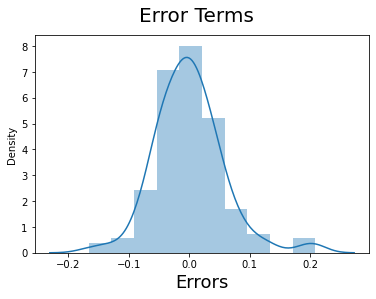

In [66]:
#histogram plot of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 10)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

the residuals are almost normally distributed .Therefore the assumption for the linear regression model is satisfied

 Prediction and Evaluation

In [67]:
#Scaling the test set
num_vars = ['wheelbase','curbweight', 'enginesize','boreratio','horsepower','mileage','carlength','carwidth','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [68]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [69]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [70]:
# Making predictions
y_pred = lm.predict(x_test_new)

In [71]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8514575486704684

Text(0, 0.5, 'y_pred')

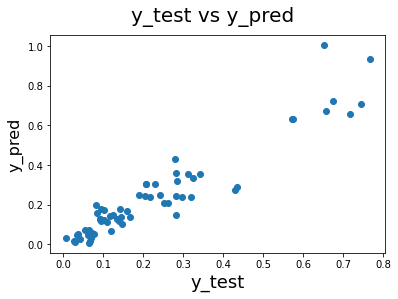

In [72]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)            
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)   

Evaluation of the model using Statistics

In [73]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     369.9
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           1.12e-72
Time:                        13:04:32   Log-Likelihood:                 205.58
No. Observations:                 143   AIC:                            -401.2
Df Residuals:                     138   BIC:                            -386.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0937      0.016     -5.916      0.000      -0.125      -0.062
horsepower     0.3337      0.031     10.698      0.000       0.272       0.395
carwidth       0.3349      0.039      8.556      0.000       0.257       0.412
hatchback     -0.0333      0.011     -3.077      0.003      -0.055      -0.012
Highend        0.2846      0.019     14.785      0.000       0.247       0.323
==============================================================================
Omnibus:                       22.377   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.846
Skew:                           0.711   Prob(JB):                     8.19e-10
Kurtosis:                       5.236   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. R2 and adjR2 value are 0.915 and 0.912 -more than 90% explained variance
2.  All the variables are having p value<0.05 .therefore all the predictors are statistically significant
3.  F statistic -369.9 (significant) and prob(F statistic -1.12e-72 approx=0)model fit is significant